In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
import string

from wordcloud import WordCloud
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from adjustText import adjust_text

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import confusion_matrix

import joblib
import plotly.figure_factory as ff
import numpy as np

In [2]:
# Caricare il dataset
file_path = 'data/filtered_language_detection.csv'  # Sostituisci con il percorso del tuo file CSV
data = pd.read_csv(file_path, usecols=['lan_code', 'sentence'])

# Divisione in caratteristiche (X) e target (y)
X = data['sentence']
y = data['lan_code']

# Generare la matrice TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(X)

print("Vectorizer ready")



Vectorizer ready


In [3]:
print(len(tfidf_vectorizer.get_feature_names_out()))

1000


In [4]:
X_tfidf.shape

(10041510, 1000)

In [30]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=30)  # Riduci a 100 dimensioni
X_reduced = svd.fit_transform(X_tfidf)


ValueError: x and y must be the same size

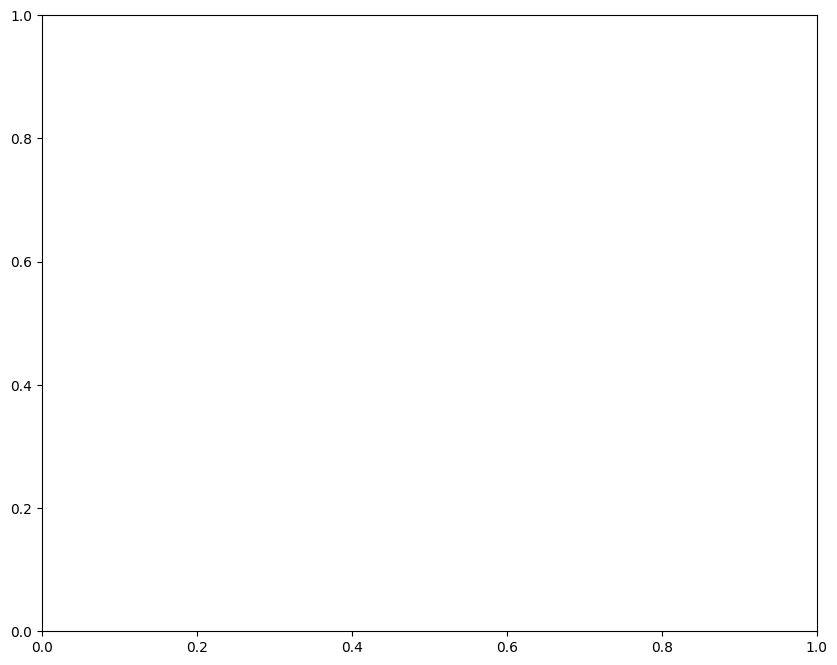

In [21]:
plt.figure(figsize=(10, 8))
plt.scatter(range(1,101),svd.explained_variance_)
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.show()

In [27]:
right_sing_vectors = svd.components_
document_term_matrix = X_reduced.dot(right_sing_vectors)

MemoryError: Unable to allocate 74.8 GiB for an array with shape (10041510, 1000) and data type float64

In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=48, random_state=42)  # Specifica il numero di cluster
clusters = kmeans.fit_predict(X_reduced)


In [32]:
tsvd_plot = TruncatedSVD(n_components=2)
X_2d = tsvd_plot.fit_transform(X_reduced)

In [34]:
right_sing_vectors = tsvd_plot.components_
proj_matrix = X_2d.dot(right_sing_vectors)

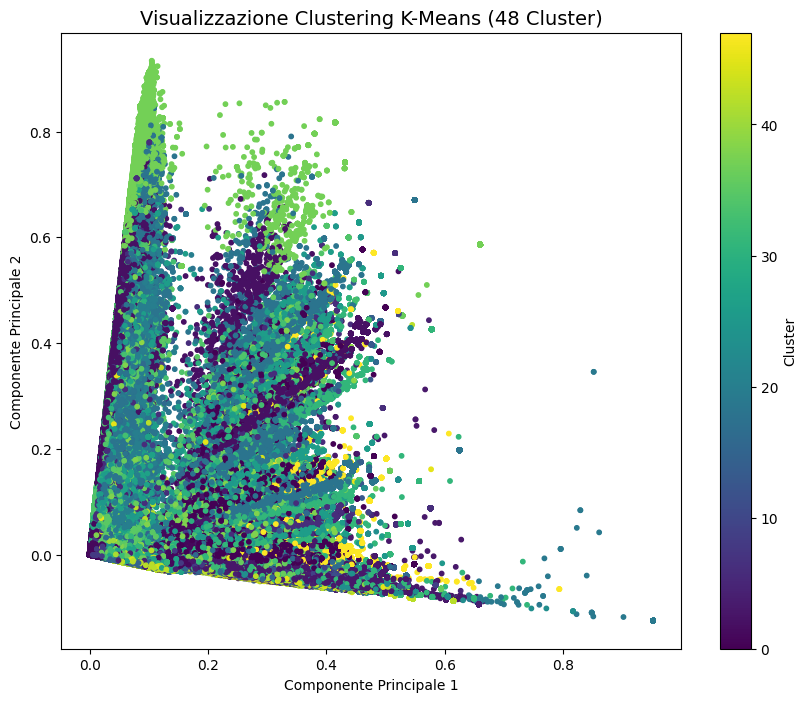

In [35]:
# Creazione del plot
plt.figure(figsize=(10, 8))
plt.scatter(proj_matrix[:, 0], proj_matrix[:, 1], c=clusters, cmap='viridis', s=10)
plt.colorbar(label='Cluster')
plt.title('Visualizzazione Clustering K-Means (48 Cluster)', fontsize=14)
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.show()

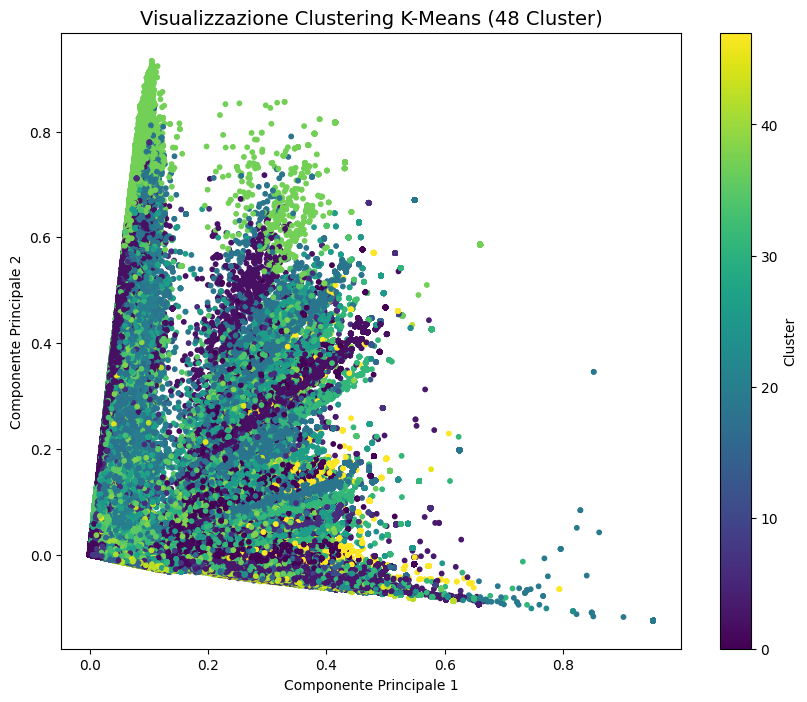

In [33]:
# Creazione del plot
plt.figure(figsize=(10, 8))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters, cmap='viridis', s=10)
plt.colorbar(label='Cluster')
plt.title('Visualizzazione Clustering K-Means (48 Cluster)', fontsize=14)
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.show()

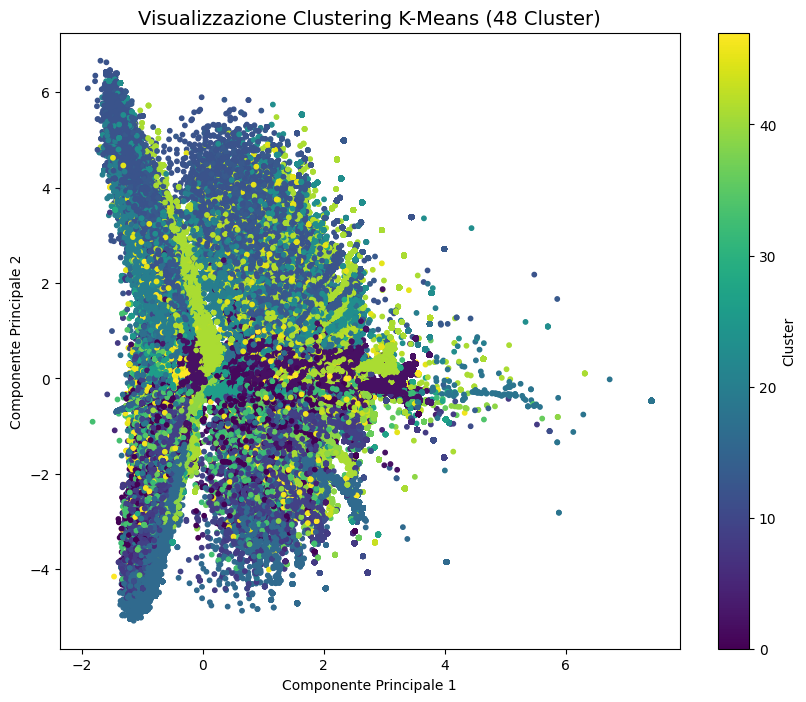

In [29]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Riduzione della dimensionalità a 2 componenti per il plot
pca_plot = PCA(n_components=2)
X_2d = pca_plot.fit_transform(X_reduced)

# Creazione del plot
plt.figure(figsize=(10, 8))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=clusters, cmap='viridis', s=10)
plt.colorbar(label='Cluster')
plt.title('Visualizzazione Clustering K-Means (48 Cluster)', fontsize=14)
plt.xlabel('Componente Principale 1')
plt.ylabel('Componente Principale 2')
plt.show()
